In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

In [2]:
# Open the csv files
df_train = pd.read_csv('/Users/arnav/Desktop/MachineLearning/ML_CSE343 Project/train_word2vec.csv')
df_test = pd.read_csv('/Users/arnav/Desktop/MachineLearning/ML_CSE343 Project/test_word2vec.csv')

# Open the labels
train_labels = pd.read_csv('/Users/arnav/Desktop/MachineLearning/ML_CSE343 Project/CSE343-ML-Project/Data/Preprocessed-Data/train_labels.csv')
test_labels = pd.read_csv('/Users/arnav/Desktop/MachineLearning/ML_CSE343 Project/CSE343-ML-Project/Data/Preprocessed-Data/test_labels.csv')

In [3]:
# Add the labels to the data
df_train['class'] = train_labels['class']
df_test['class'] = test_labels['class']

# Merge the dataframes
df = pd.concat([df_train, df_test])

# Convert the dataframe to a numpy array
X = df.drop('class', axis=1).values
y_temp = df['class'].values

print(X.shape)

(30000, 513)


In [4]:
print(y_temp)

# Convert the labels to integers i.e. 0 for non-suicide and 1 for suicide
y = [0 if label == "non-suicide" else 1 for label in y_temp]

print(y)

['non-suicide' 'non-suicide' 'non-suicide' ... 'non-suicide' 'suicide'
 'suicide']
[0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0

In [5]:
# Reduce the dimensionality of the data to 2 dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Fit and transform the data    
X_2d = tsne.fit_transform(X)

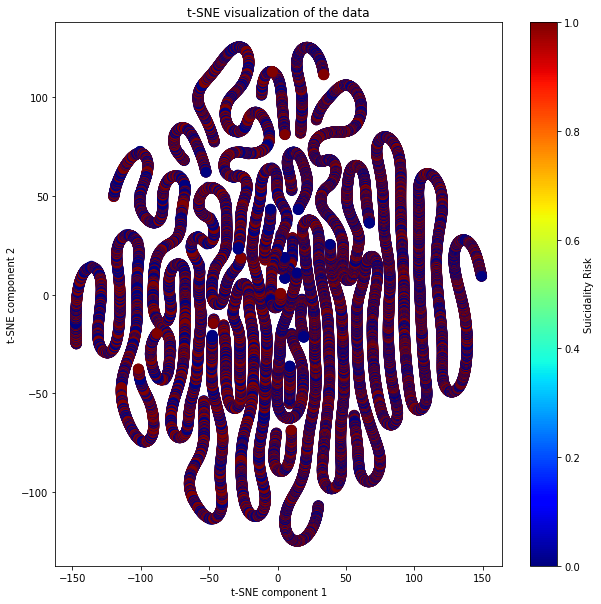

In [6]:
# Create a scatter plot of the t-SNE reduced data
plt.figure(figsize=(10, 10))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='jet', s=100)  # Increased dot size with s=100
plt.colorbar(label='Suicidality Risk')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('t-SNE visualization of the data')
plt.show()